# BANK LOAN ANALYSIS REPORT

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [25]:
df = pd.read_csv("C:/Users/ASUS/Downloads/financial_loan.xlsx - financial_loan.csv")

In [5]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2/11/2021,9/13/2021,4/13/2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,1/1/2021,12/14/2021,1/15/2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,1/5/2021,12/12/2021,1/9/2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2/25/2021,12/12/2021,3/12/2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,1/1/2021,12/14/2021,1/15/2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [6]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,7/11/2021,5/16/2021,5/16/2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,10/11/2021,4/16/2021,5/16/2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,9/11/2021,5/16/2021,5/16/2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,10/11/2021,5/16/2021,5/16/2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,7/11/2021,5/16/2021,5/16/2021,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


### Metadata of data

In [7]:
print("No. of Rows:", df.shape [0])

No. of Rows: 38576


In [8]:
print("No. of Columns:", df.shape[1])

No. of Columns: 24


In [9]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership  issue_date  \
0                                Ryder     C           RENT   2/11/2021   
1                       MKC Accounting     E           RENT    1/1/2021   
2                Chema

### Convert date columns

In [29]:
date_cols = ['issue_date', 'last_credit_pull_date', 'last_payment_date', 'next_payment_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

### Data Types

In [30]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [13]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


### Total Loan Applications

In [16]:
total_loan_application = df['id'].count()
print("Total Loan Applications:", total_loan_application)

Total Loan Applications: 38576


### MTD Total Loan Applications

In [36]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications (for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_applications}")
                                                          

MTD Loan Applications (for December 2021): 4314


### Total Funded Amount

In [37]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount/ 1000000
print("Total Funded Amount: ${:.2f}M". format(total_funded_amount_millions))

Total Funded Amount: $435.76M


### MTD- Total Funded Amount

In [42]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount/1000000

print("MTD Total Funded Amount: ${:.2f}M". format(mtd_total_funded_amount_millions))

MTD Total Funded Amount: $53.98M


### Total Amount Received

In [43]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_amount_received/ 1000000
print("Total Amount Received: ${:.2f}M". format(total_amount_received_millions))

Total Amount Received: $473.07M


### MTD Total Amount Received

In [46]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received/1000000

print("MTD Total Amount Received: ${:.2f}M". format(mtd_total_amount_received_millions))

MTD Total Amount Received: $58.07M


### Average Interest rate 

In [50]:
average_interest_rate= df['int_rate'].mean()*100
print("Avg Int Rate:{:.2f}%".format(average_interest_rate))

Avg Int Rate:12.05%


### Average Debt-to-Income Ratio (DTI)

In [51]:
average_dti= df['dti'].mean()*100
print("Avg DTI:{:.2f}%".format(average_dti))

Avg DTI:13.33%


### Good Loan Metrics

In [53]:
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])] 

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1000000
good_loan_received_millions = good_loan_received / 1000000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications:", good_loan_applications)
print("Good Loan Funded Amount (in Millions): ${:,.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Received (in Millions): ${:,.2f}M".format(good_loan_received_millions))
print("Percentage of Good Loan Applications: {:.2f}%".format(good_loan_percentage))


Good Loan Applications: 33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Received (in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


### Bad Loan Metrics

In [58]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])] 

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1000000
bad_loan_received_millions = bad_loan_received / 1000000

bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications:", bad_loan_applications)
print("Bad Loan Funded Amount (in Millions): ${:,.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Total Received (in Millions): ${:,.2f}M".format(bad_loan_received_millions))
print("Percentage of Bad Loan Applications: {:.2f}%".format(bad_loan_percentage))


Bad Loan Applications: 5333
Bad Loan Funded Amount (in Millions): $65.53M
Bad Loan Total Received (in Millions): $37.28M
Percentage of Bad Loan Applications: 13.82%


### Monthly Trends by Issue Date for Total Funded Amount

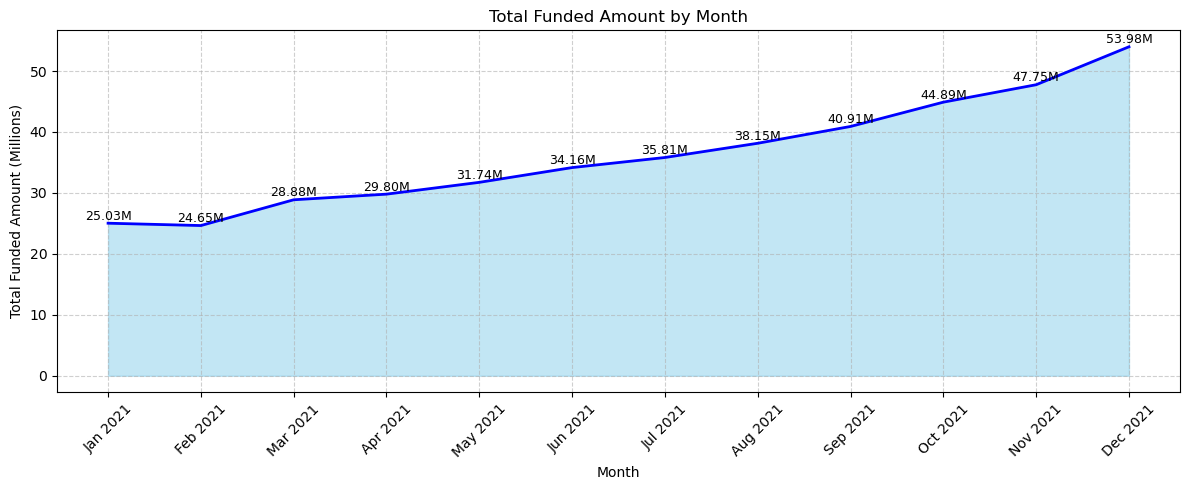

In [59]:
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1_000_000)
      .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(12, 5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], 
                 color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], 
         color='blue', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, 
             f"{row['loan_amount_millions']:.2f}M", 
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Funded Amount by Month', fontsize=12)
plt.ylabel('Total Funded Amount (Millions)', fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Monthly Trends by Issue Date for for Loan Applications

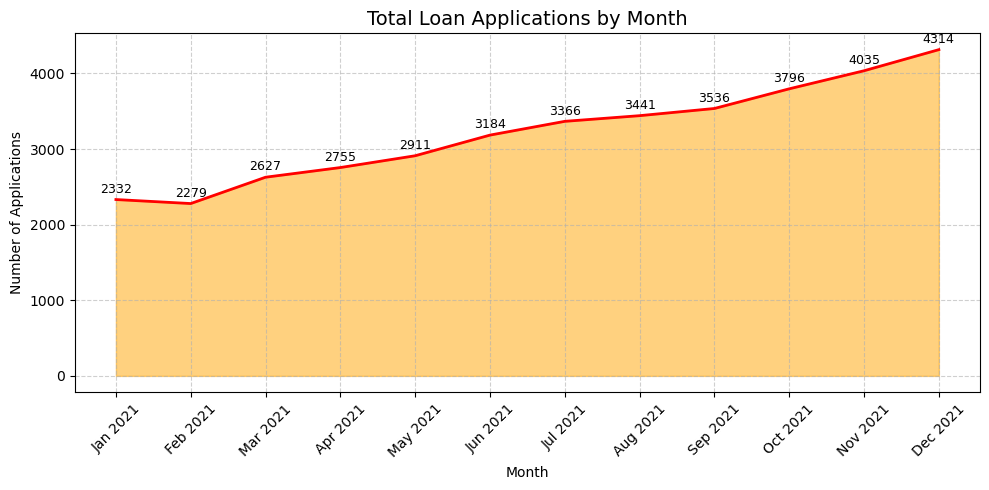

In [60]:
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['id']
      .count()
      .reset_index(name='application_count')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['application_count'],
                 color='orange', alpha=0.5)
plt.plot(monthly_applications['month_name'], monthly_applications['application_count'],
         color='red', linewidth=2)

# Add text labels
for i, row in monthly_applications.iterrows():
    plt.text(i, row['application_count'] + 50,
             f"{row['application_count']}", ha='center', va='bottom', fontsize=9, color='black')

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Number of Applications', fontsize=10)
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Monthly Trends by Issue Date for Total Loan Applications

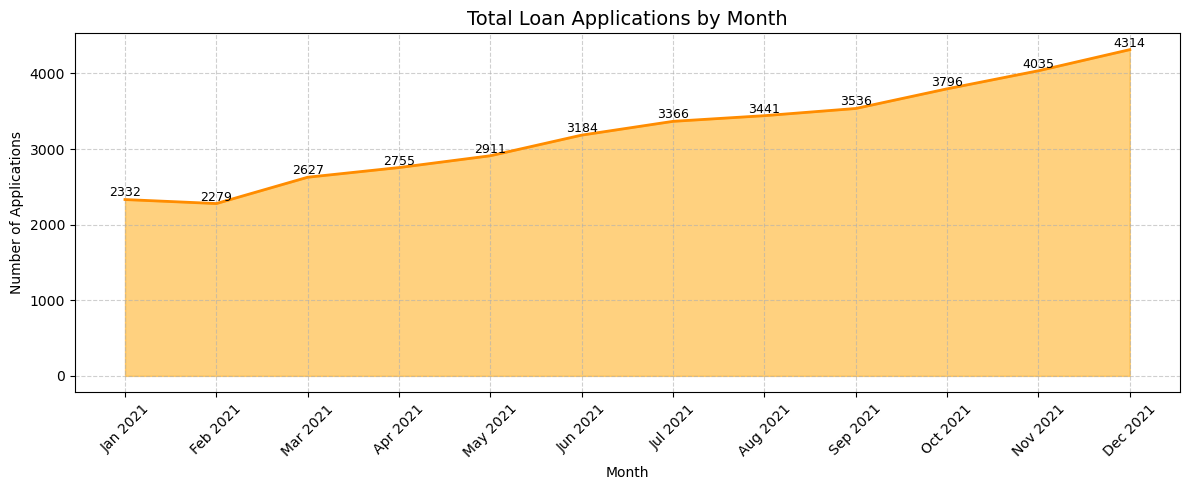

In [61]:
monthly_applications = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['id']
    .count()
    .reset_index(name='loan_applications_count')
)

plt.figure(figsize=(12, 5))
plt.fill_between(monthly_applications['month_name'], 
                 monthly_applications['loan_applications_count'], 
                 color='orange', alpha=0.5)

plt.plot(monthly_applications['month_name'], 
         monthly_applications['loan_applications_count'], 
         color='darkorange', linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.5, 
             f"{row['loan_applications_count']}", 
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Number of Applications', fontsize=10)
plt.xticks(range(len(monthly_applications)), 
           labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Regional Analysis by State for Total Funded Amount

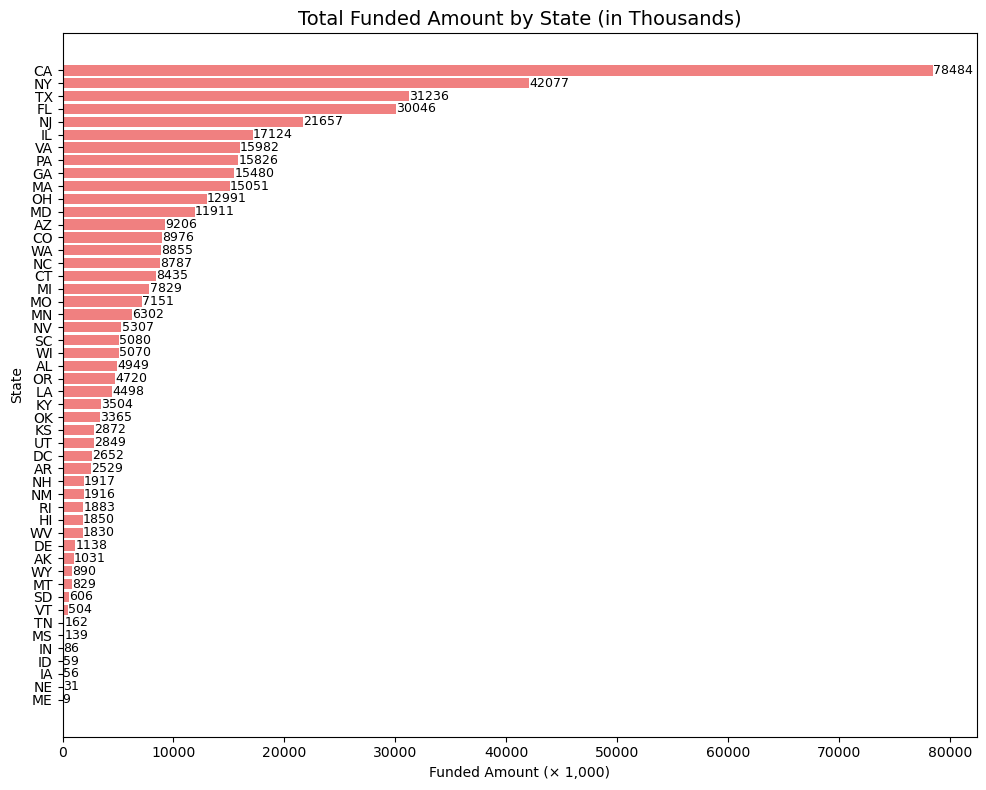

In [62]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)

# Convert to thousands for readability
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, 
                state_funding_thousands.values, 
                color='lightcoral')

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, 
             bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', 
             va='center', fontsize=9)

plt.title('Total Funded Amount by State (in Thousands)', fontsize=14)
plt.xlabel('Funded Amount (× 1,000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


### Loan Term Analysis by Total Funded Amount

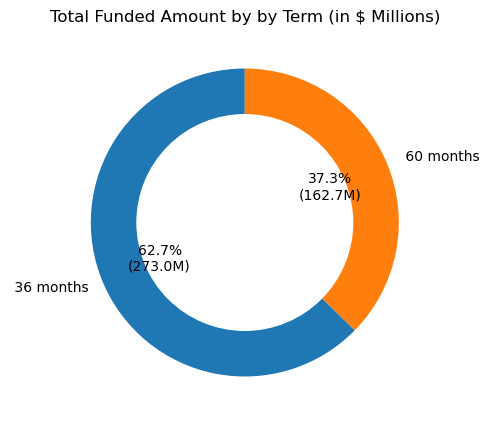

In [67]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1_000_000

plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f'{p:.1f}%\n({p*sum(term_funding_millions)/100:.1f}M)',
    startangle=90,
    wedgeprops={'width': 0.4}  # makes it a donut chart
)

# Add a white circle in the middle (for donut effect)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))

plt.title("Total Funded Amount by by Term (in $ Millions)")
plt.show()


### Employee Length by Total Funded Amount

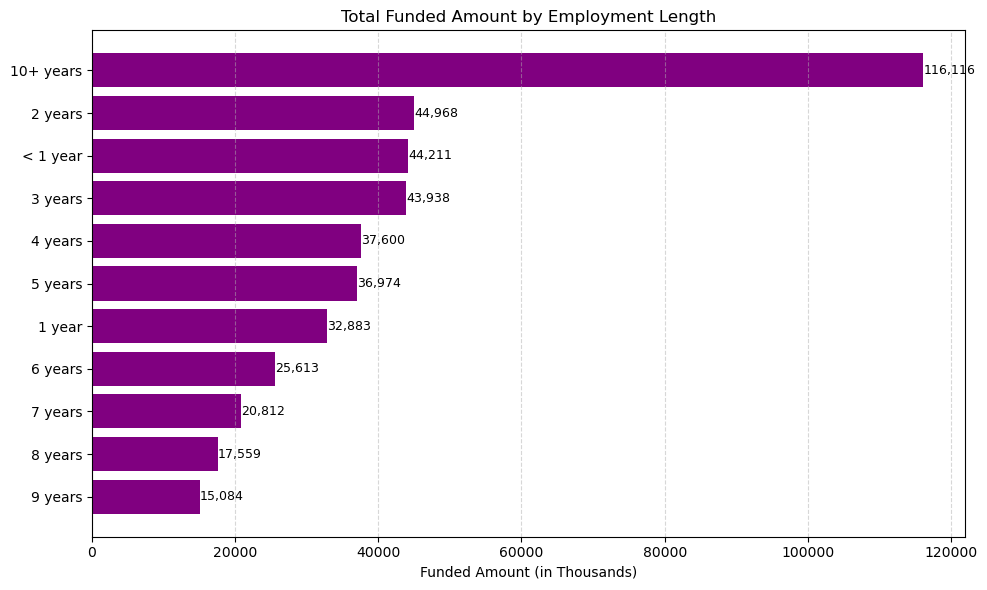

In [72]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values() / 1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding.index, emp_funding.values, color='purple')

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}', va='center', fontsize=9)

plt.xlabel("Funded Amount (in Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Loan Purpose by Total Funded Amount

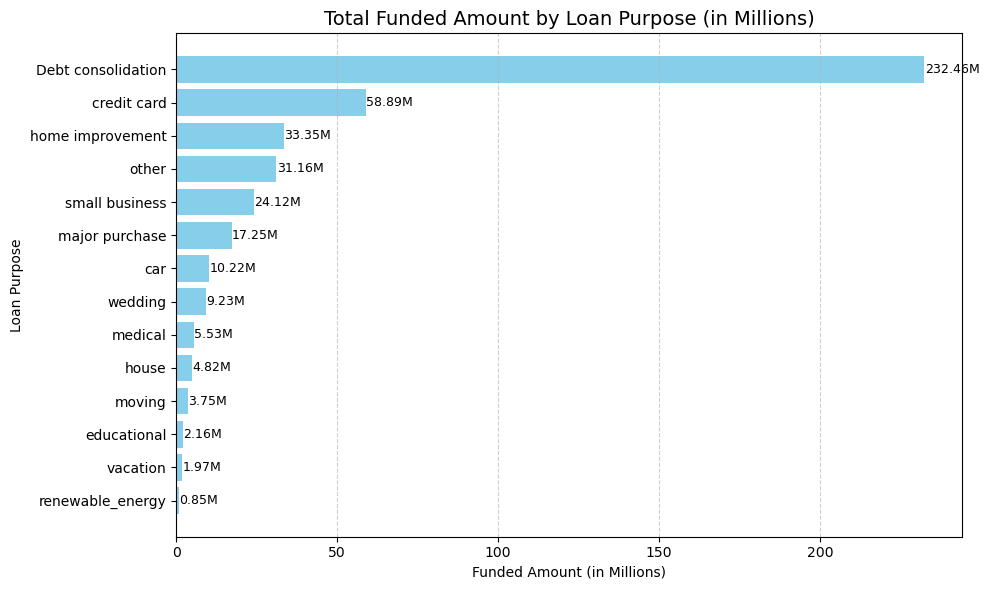

In [75]:

purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values() / 1000000)

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='skyblue')

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}M', va='center', fontsize=9)

plt.title("Total Funded Amount by Loan Purpose (in Millions)", fontsize=14)
plt.xlabel("Funded Amount (in Millions)")
plt.ylabel("Loan Purpose")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Home ownership by Total Funded Amount

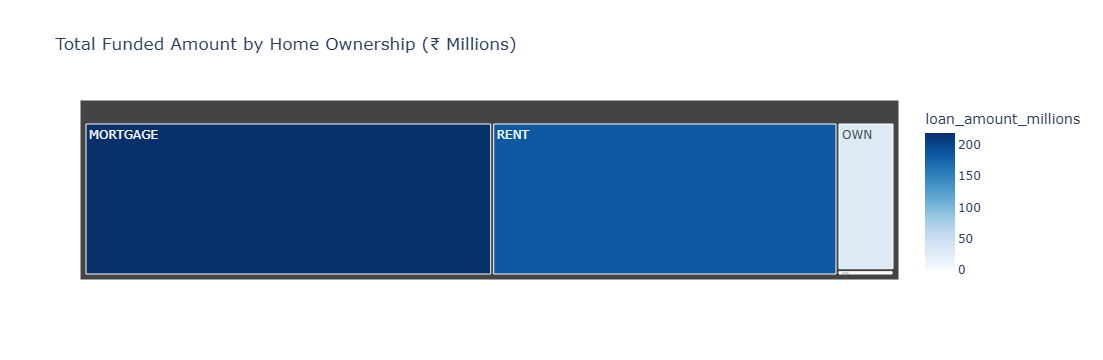

In [78]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1000000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership (₹ Millions)'
)

fig.show()